# Popularity Based Recommender system

## Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
#movies.head()

In [5]:
credits.rename(columns={"movie_id": "id"}, inplace=True)

In [6]:
movies_df = movies.merge(credits, on='id')

In [7]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

Note: As we are building a demographic recommendation system we only need to consider the popularity of the movie and the vote_average.

In [9]:
movie_ratings = movies_df[['id','original_title', 'popularity', 'vote_average', 'vote_count']]

### Weighted Average Movie Rating.



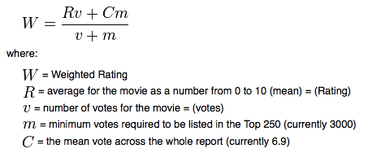

Currently IMDb use this formula for their rating system where viewers’ votes are plugged into to change the movies rating. This formula is employed to prevent extreme votes from skewing the data and providing an inaccurate result.

In [10]:
# Calculate all the components based on the above formula
C=movie_ratings['vote_average'].mean()
m=movie_ratings['vote_count'].quantile(0.95) 
# We will consider 90th percentile rather than Top 250, which gives us Top 241 movies. 
v=movie_ratings['vote_count']
R=movie_ratings['vote_average']

In [11]:
movie_ratings['vote_count'].quantile(0.95) 

3040.8999999999996

In [12]:
movie_ratings[movie_ratings['vote_count'] > m].shape[0]

241

In [13]:
# Calculate all the components based on the above formula
C=movie_ratings['vote_average'].mean()
m=movie_ratings['vote_count'].quantile(0.95) 

# We will define a function to get the weighted average.
def weighted_Avgrating(df, C=C, m=m):

    # We will consider 90th percentile rather than Top 250, which gives us Top 241 movies. 
    v=df['vote_count']
    R=df['vote_average']
    # Calculation based on the IMDB formula
    return ((R*v)+ (C*m))/(v+m)

In [14]:
movie_ratings['Weighted_Rating'] = movie_ratings.apply(weighted_Avgrating, axis=1)

C:\Users\ANSUMA~1\AppData\Local\Temp/ipykernel_4692/248074472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_ratings['Weighted_Rating'] = movie_ratings.apply(weighted_Avgrating, axis=1)


### Top 10 Movies based on Weighted Ratings.

In [15]:
movie_ratings.sort_values('Weighted_Rating', ascending=False, ignore_index=True).head(10)

,id,original_title,popularity,vote_average,vote_count,Weighted_Rating
0,278,The Shawshank Redemption,136.747729,8.5,8205,7.848921
1,155,The Dark Knight,187.322927,8.2,12002,7.773906
2,550,Fight Club,146.757391,8.3,9413,7.760909
3,27205,Inception,167.583710,8.1,13752,7.736417
4,680,Pulp Fiction,121.463076,8.3,8428,7.714609
5,157336,Interstellar,724.247784,8.1,10867,7.660997
6,13,Forrest Gump,138.133331,8.2,7927,7.615595
7,238,The Godfather,143.659698,8.4,5893,7.614467
8,122,The Lord of the Rings: The Return of the King,123.630332,8.1,8064,7.550188
9,120,The Lord of the Rings: The Fellowship of the Ring,138.049577,8.0,8705,7.506082


In [16]:
Top10 = movie_ratings.sort_values('Weighted_Rating', ascending=False, ignore_index=True).head(10)

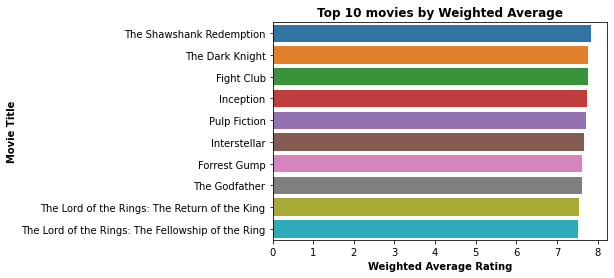

In [17]:
sns.barplot(data = Top10, y=Top10['original_title'], x =Top10['Weighted_Rating'])
plt.title('Top 10 movies by Weighted Average', weight='bold')
plt.xlabel('Weighted Average Rating', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

### Top 10 Movies based on Popularity.

In [18]:
Top10_pop = movie_ratings.sort_values('popularity', ascending=False, ignore_index=True).head(10)

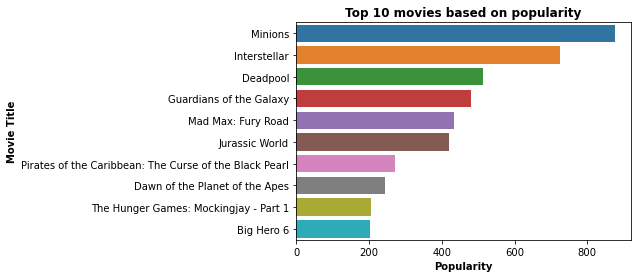

In [19]:
sns.barplot(data = Top10_pop, y=Top10_pop['original_title'], x =Top10_pop['popularity'])
plt.title('Top 10 movies based on popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

## Recommendation based on Popularity and Weighted Ratings.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_minmax_df=scaling.fit_transform(movie_ratings[['Weighted_Rating','popularity']])
movie_normalized=pd.DataFrame(movie_minmax_df,columns=['Weighted_Rating','popularity'])
movie_normalized.head()

,Weighted_Rating,popularity
0,0.647019,0.171815
1,0.486322,0.158846
2,0.341881,0.122635
3,0.747571,0.128272
4,0.293353,0.050169


In [21]:
movie_ratings['Norm_Weighted_Rating'] = movie_normalized['Weighted_Rating']
movie_ratings['Norm_popularity'] = movie_normalized['popularity']

C:\Users\ANSUMA~1\AppData\Local\Temp/ipykernel_4692/2641781082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_ratings['Norm_Weighted_Rating'] = movie_normalized['Weighted_Rating']
C:\Users\ANSUMA~1\AppData\Local\Temp/ipykernel_4692/2641781082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_ratings['Norm_popularity'] = movie_normalized['popularity']


In [22]:
movie_ratings.head()

,id,original_title,popularity,vote_average,vote_count,Weighted_Rating,Norm_Weighted_Rating,Norm_popularity
0,19995,Avatar,150.437577,7.2,11800,6.973006,0.647019,0.171815
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.574240,0.486322,0.158846
2,206647,Spectre,107.376788,6.3,4466,6.215813,0.341881,0.122635
3,49026,The Dark Knight Rises,112.312950,7.6,9106,7.222525,0.747571,0.128272
4,49529,John Carter,43.926995,6.1,2124,6.095391,0.293353,0.050169


In [23]:
movie_ratings['score'] = (movie_ratings['Norm_Weighted_Rating'] 
+ movie_ratings['Norm_popularity']) * 50

C:\Users\ANSUMA~1\AppData\Local\Temp/ipykernel_4692/1665085190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_ratings['score'] = (movie_ratings['Norm_Weighted_Rating']


In [24]:
Top10_score = movie_ratings.sort_values('score', ascending=False, ignore_index=True)

In [25]:
Top10_score.head(10)

,id,original_title,popularity,vote_average,vote_count,Weighted_Rating,Norm_Weighted_Rating,Norm_popularity,score
0,157336,Interstellar,724.247784,8.1,10867,7.660997,0.924269,0.827162,87.571580
1,118340,Guardians of the Galaxy,481.098624,7.9,9742,7.469939,0.847276,0.549462,69.836884
2,211672,Minions,875.581305,6.4,4571,6.277025,0.366549,1.000000,68.327436
3,293660,Deadpool,514.569956,7.4,10995,7.116657,0.704908,0.587690,64.629884
4,155,The Dark Knight,187.322927,8.2,12002,7.773906,0.969770,0.213941,59.185548
5,278,The Shawshank Redemption,136.747729,8.5,8205,7.848921,1.000000,0.156179,57.808968
6,27205,Inception,167.583710,8.1,13752,7.736417,0.954663,0.191397,57.302983
7,550,Fight Club,146.757391,8.3,9413,7.760909,0.964532,0.167611,56.607185
8,76341,Mad Max: Fury Road,434.278564,7.2,9427,6.929802,0.629609,0.495989,56.279871
9,680,Pulp Fiction,121.463076,8.3,8428,7.714609,0.945874,0.138723,54.229853


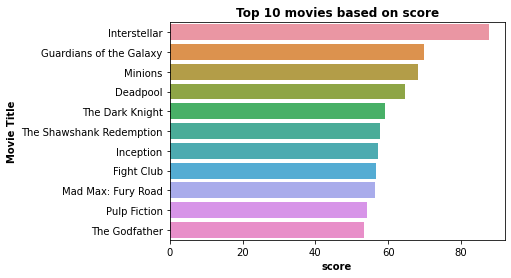

In [29]:
sns.barplot(data = Top10_score, y=Top10_score['original_title'].iloc[0:11], x =Top10_score['score'].iloc[0:11])
plt.title('Top 10 movies based on score', weight='bold')
plt.xlabel('score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_4692/3589630689.py, line 1)

In [44]:
popularity = Top10_score.sort_values('popularity', ascending= False, ignore_index=True)

In [46]:
popularity.drop(columns=['id', 'vote_average', 'vote_count', 'Weighted_Rating', 'Norm_Weighted_Rating', 'Norm_popularity', 'score'])

,original_title,popularity
0,Minions,875.581305
1,Interstellar,724.247784
2,Deadpool,514.569956
3,Guardians of the Galaxy,481.098624
4,Mad Max: Fury Road,434.278564
...,...,...
4798,Midnight Cabaret,0.001389
4799,Hum To Mohabbat Karega,0.001186
4800,Penitentiary,0.001117
4801,Alien Zone,0.000372


In [30]:
import pickle

In [31]:
Top10_score.to_pickle('top10.pkl')

****END****